<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
#Import Everything
from collections import Counter
import re
import requests
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import spacy
import bs4
from bs4 import BeautifulSoup
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

nlp = spacy.load("en_core_web_lg")

In [2]:
#load the data
yelp = pd.read_json('./review_sample.json', lines=True)

In [3]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [4]:
yelp.shape

(10000, 9)

In [5]:
#removes new lines and duplicate white spaces
" ".join('text'.split())

def clean_text(text):
    text = text.lower() #makes all text lower case
    text = re.sub(r'[^a-zA-Z ^0-9]', '', text) #makes just letters and numbers
    return text

#clean the text
for i in range(0, len(yelp)):
    yelp['text'][i] = clean_text(yelp['text'][i])
    
yelp['text'].head()

C:\Users\Ashley\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0    beware fake fake fakewe also own a small busin...
1    came here for lunch togo service was quick sta...
2    ive been to vegas dozens of times and had neve...
3    we went here on a night where they closed off ...
4    35 to 4 starsnot bad for the price 1299 for lu...
Name: text, dtype: object

In [6]:
def tokenize(text):

    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [7]:
yelp['tokens'] = yelp['text'].apply(tokenize)

In [8]:
yelp['tokens'].head()

0    [beware, fake, fake, fakewe, also, own, a, sma...
1    [came, here, for, lunch, togo, service, was, q...
2    [ive, been, to, vegas, dozens, of, times, and,...
3    [we, went, here, on, a, night, where, they, cl...
4    [35, to, 4, starsnot, bad, for, the, price, 12...
Name: tokens, dtype: object

In [9]:
#Analyzing the tokens

# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
yelp['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 54419),
 ('and', 38616),
 ('i', 28829),
 ('a', 28210),
 ('to', 27656),
 ('was', 19313),
 ('of', 16121),
 ('it', 13656),
 ('is', 13483),
 ('for', 13262)]

In [10]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [11]:
tokenizer = Tokenizer(nlp.vocab)
STOP_WORDS = nlp.Defaults.stop_words

In [12]:
# Tokenizer pipe removing stop words, blank words, and lemmatizing
tokens = []

for doc in tokenizer.pipe(yelp['text'], batch_size=500):
    
    doc_tokens = []
    for token in doc:
        if (token.lemma_ not in STOP_WORDS) & (token.text != ' '):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)

yelp['tokens'] = tokens
yelp['tokens'].head()

0    [beware, fake, fake, fakewe, small, business, ...
1    [come, lunch, togo, service, quick, staff, fri...
2    [ive, vega, dozen, time, step, foot, circus, c...
3    [night, close, street, party, actually, group,...
4    [35, 4, starsnot, bad, price, 1299, lunch, sen...
Name: tokens, dtype: object

In [13]:
#Creating word count
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [14]:
wc = count(yelp['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
41,good,4046,6480,1.0,0.013343,0.013343,0.4046
130,place,3589,5339,2.0,0.010994,0.024337,0.3589
133,food,3326,4985,3.0,0.010265,0.034601,0.3326
203,great,3086,4254,4.0,0.008759,0.043361,0.3086
11,time,2907,4223,5.0,0.008696,0.052056,0.2907


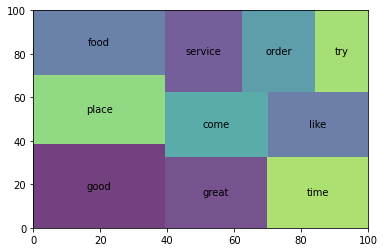

In [15]:
#Graph the wc top 10
wc_top10 = wc[wc['rank'] <= 10]

squarify.plot(sizes=wc_top10['pct_total'], label=wc_top10['word'], alpha=.75)
plt.show()


Part 2: Vector Representation
1. Create a vector representation of the reviews 2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns? - Given the size of the dataset, it will probably be best to use a NearestNeighbors model for this.

In [16]:
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.text != ' ')]

In [17]:
# create the transformer
vect = CountVectorizer(tokenizer=tokenize, stop_words=STOP_WORDS)

# build vocab
vect.fit(yelp['text'])

# transform text
dtm = vect.transform(yelp['text'])
print(dtm.shape)

C:\Users\Ashley\Anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\Ashley\Anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['d', 'm', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(10000, 32684)


In [18]:
dtmwc = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtmwc.head()

,,-PRON-,0,001695do,001695howard,007,011802,0227,025,035lbs,...,zuma,zumanity,zumba,zuni,zupas,zuzana,zuzu,zyrtec,zzaplon,zzzzzzzzzmy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#TDF IDF feature matrix

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words=STOP_WORDS, 
                        ngram_range=(1,2),
                        max_df=.97, #percentage if appears in about 97% of docuemnts cut it
                        min_df=5, #at least in 5 documents
                        tokenizer=tokenize)

#tokenize and build vocab via fitting
tfidf.fit(yelp['text'])

#transform
dtm = tfidf.transform(yelp['text']) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()


C:\Users\Ashley\Anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['d', 'm', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,,enjoy,food,good,great,highly,leave,like,look,love,...,zach,zen,zero,zero star,zest,zip,zombie,zone,zoo,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#Nearest Neighbor
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [22]:
fake_review = ["""What a great place! The atmosphere was cool and the staff were friendly."""]

In [23]:
#query 

new = tfidf.transform(fake_review)
nn.kneighbors(new.todense())

(array([[1.        , 1.        , 1.11996788, 1.12795082, 1.16107917]]),
 array([[6204, 6311, 7453, 1192, 1802]], dtype=int64))

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [24]:
#Let's check out the value counts for the 'stars' column

yelp['stars'].value_counts()

5    4462
4    2185
1    1496
3    1098
2     759
Name: stars, dtype: int64

In [25]:
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
rfc = RandomForestClassifier()

In [26]:
#creating pipeline
clf = rfc

pipe = Pipeline([('vect', vect), ('clf', clf)])

In [27]:
#defining parameters
parameters = {
    'vect__min_df': (0.02, 0.05),
    'vect__max_df': (0.75, 1.0),
    'vect__max_features': (500, 1000),
    'clf__max_depth':(5,10,15,20),
    'clf__n_estimators': (25, 100)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(yelp['text'], yelp['stars'])

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   38.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 320 out of 320 | elapsed:  5.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [28]:
grid_search.best_score_

0.5519999999999999

In [29]:
grid_search.predict(fake_review)

array([5], dtype=int64)

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [32]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

#more imports 

import gensim

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

Learn the vocubalary of the yelp data:

In [34]:
rev_total = yelp.shape[0]
reviews = []

for i in range (0, rev_total):
    reviews.append(tokenize(yelp['text'][i]))

In [35]:
id2word = corpora.Dictionary(reviews)

Create a bag of words representation of the entire corpus

In [37]:
corpus = [id2word.doc2bow(review) for review in reviews]

Your LDA model should be ready for estimation: 

In [38]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

Create 1-2 visualizations of the results

In [39]:
# Strip out the words
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

topics = [' '.join(t[0:5]) for t in words]


for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
not good food time place

------ Topic 1 ------
not food place come time

------ Topic 2 ------
not good great food place

------ Topic 3 ------
not good time service come

------ Topic 4 ------
good not food place service

------ Topic 5 ------
good not place food time

------ Topic 6 ------
good not place come great

------ Topic 7 ------
not place good like food

------ Topic 8 ------
not good place like food

------ Topic 9 ------
good not place great food



In [40]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [41]:

# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                            corpus=corpus, 
                                            limit=20)

In [42]:
topic_coherence = pd.DataFrame.from_records(coherence_values)
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,2,-1.487783
1,0,5,-1.551739
2,0,8,-1.549191
3,0,11,-1.535894
4,0,14,-1.561848


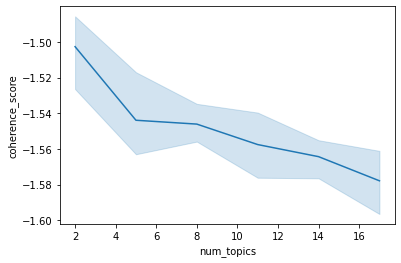

In [43]:
ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)